In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [77]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


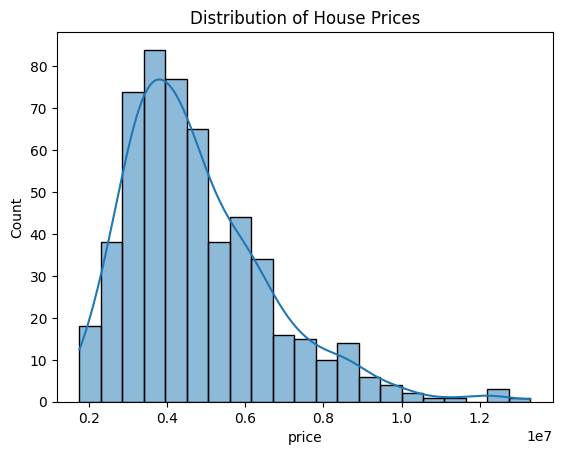

In [81]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()


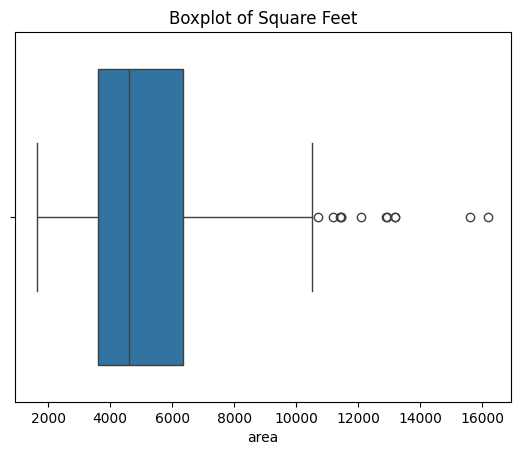

In [82]:
sns.boxplot(x=df['area'])
plt.title('Boxplot of Square Feet')
plt.show()

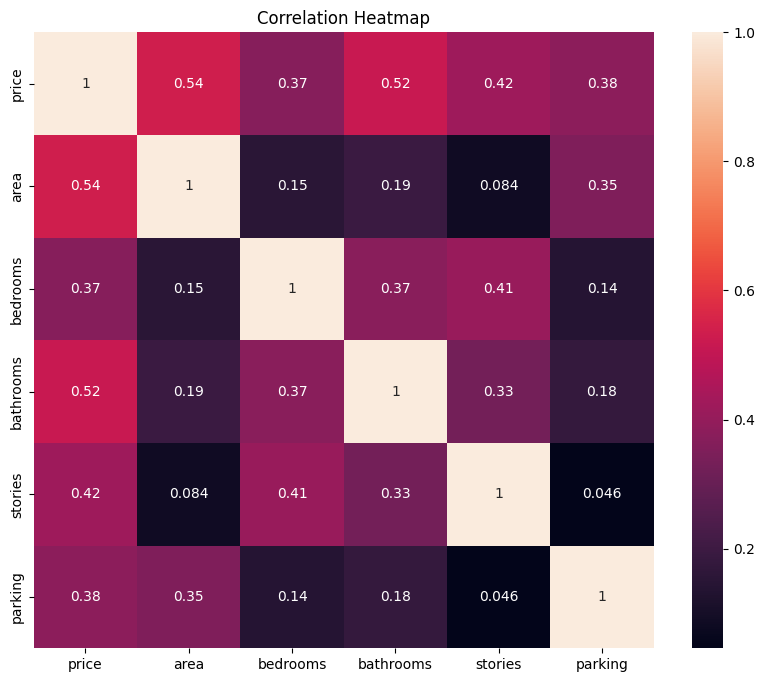

In [87]:
num = df.select_dtypes(exclude="object").columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [88]:
x = df.drop('price',axis=1)
y = df['price']

In [91]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [92]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [93]:
num_cat = x.select_dtypes(exclude="object").columns
cat_cat = x.select_dtypes(include="object").columns

In [94]:
num_cat

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [95]:
cat_cat=cat_cat.drop('furnishingstatus')
cat_cat

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [96]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first')
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']]) 

In [97]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", ordinal_encoder, ['furnishingstatus']),
        ("OneHotEncoder",ohe,cat_cat),
        ("StandardScaler",scaler,num_cat)
    ]
)

In [98]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


In [99]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.384168,0.055271,1.539173,2.587644,0.367957
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.929181,0.055271,1.539173,-0.912499,2.709987
2,2.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.607755,-1.283514,-0.557950,-0.912499,1.538972
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.155492,0.055271,-0.557950,0.254215,-0.803059
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.637730,0.055271,-0.557950,0.254215,-0.803059


In [100]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [101]:
models = {
    "Random Forest":RandomForestRegressor(),
    "Tree":DecisionTreeRegressor(),
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Elastic Net":ElasticNet(),
    "AdaBoost":AdaBoostRegressor(),
    "XGB":XGBRegressor(),
    "Gradient Boost":GradientBoostingRegressor(),
    "KNN":KNeighborsRegressor()
}
len(list(models))

10

In [102]:
params = {
    "Random Forest":{
        "max_depth":[i for i in range(10)],
        "max_features":[1,3,5,7,'auto'],
        "min_samples_split":[2,8,10,15],
        "n_estimators":[100,200,300]
    },
    "Tree":{
        'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter' : ['best','random'],
        'max_depth' : [1,3,5,7],
        'max_features' : ['auto','sqrt','log2'],
        'min_samples_split':[1,3,5,6,8]
    },
    "Linear Regression":{
        "n_jobs":[-1]
    },
    "Lasso":{
        "alpha": [ 0.001, 0.01, 0.1, 1]
    },
    "Ridge":{
        "alpha": [0.01, 0.1, 1]
    },
    "Elastic Net":{
        'alpha':[0.01,0.1,1]
    },
    "AdaBoost":{
        'n_estimators':[50,100,150],
        "loss":['linear', 'square', 'exponential']
    },
    "XGB":{
        'learning_rate':[0.1,0.01,1],
    "max_depth":[1,3,5,7,9,11],
    "n_estimators":[50,100,150]
    },
    "Gradient Boost":{
        "n_estimators": [100,50,150], 
        "learning_rate": [0.001, 0.01, 0.1, 0.2], 
        "max_depth": [3, 4, 5, 7,9,],
        "min_samples_split": [2, 4, 6,8]
    },
    "KNN":{
        'n_neighbors':[i for i in range(1,11)],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

In [104]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [108]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
report = {}
for i in range( len(list(models))):
    name = list(models.keys())[i]
    print(f"---Enter {name}---")
    model = list(models.values())[i]
    grid = GridSearchCV(estimator=model,param_grid=params[name],n_jobs=-1)
    grid.fit(x_train,y_train)
    y_train_pred=grid.predict(x_train)
    y_test_pred=grid.predict(x_test)
    print("-----Train Set---")
    print(f"R2 score = {r2_score(y_train,y_train_pred)}")
    print(f"MSE = {mean_squared_error(y_train,y_train_pred)}")
    print(f"MAE = {mean_absolute_error(y_train,y_train_pred)}")
    print("-----Test Set----")
    print(f"R2 score = {r2_score(y_test,y_test_pred)}")
    print(f"MSE = {mean_squared_error(y_test,y_test_pred)}")
    print(f"MAE = {mean_absolute_error(y_test,y_test_pred)}")
    print(f"---Exit {name}---")
    report[name]=grid.best_params_
    print("\n--------------------------------------------------------\n\n")

    

---Enter Random Forest---
-----Train Set---
R2 score = 0.8858627663368601
MSE = 351929876289.8462
MAE = 442454.2290569082
-----Test Set----
R2 score = 0.6193157204306603
MSE = 1924195432768.0747
MAE = 1014824.6622537717
---Exit Random Forest---

--------------------------------------------------------


---Enter Tree---
-----Train Set---
R2 score = 0.713138086507427
MSE = 884507837518.3438
MAE = 685265.2117048311
-----Test Set----
R2 score = 0.46145901617686036
MSE = 2722093233277.74
MAE = 1191765.79688938
---Exit Tree---

--------------------------------------------------------


---Enter Linear Regression---
-----Train Set---
R2 score = 0.6854429472843789
MSE = 969902818698.3114
MAE = 718146.5977537853
-----Test Set----
R2 score = 0.6494754192267793
MSE = 1771751116594.04
MAE = 979679.6912959907
---Exit Linear Regression---

--------------------------------------------------------


---Enter Lasso---
-----Train Set---
R2 score = 0.6854429472702934
MSE = 969902818741.7426
MAE = 718145

In [109]:
report['Gradient Boost']

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [110]:
model = GradientBoostingRegressor(learning_rate=0.1,max_depth= 3,min_samples_split= 2,n_estimators= 50)
model.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=50)

In [118]:
import pickle
import os
model_dir = os.path.join(os.pardir, 'model')
os.makedirs(model_dir, exist_ok=True)
with open(os.path.join(model_dir,'model.pkl'), 'wb') as f:
    pickle.dump(model, f)

with open(os.path.join(model_dir,'preprocessor.pkl'), 'wb') as f:
    pickle.dump(preprocessor, f)
